In [1]:
box = 'Box_n50_0_1400'
param_names = ['d','e','f','g']
ndim = len(param_names)

In [2]:
from utils import *
from massfunction import *

import numpy as np
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import os
import emcee
import sys
import numpy as np
import pickle

In [3]:
cosmos_f = open('data/cosmo_params.pkl', 'rb')
cosmo_params = pickle.load(cosmos_f) #cosmo_params is a dict
cosmos_f.close()

In [4]:
cosmo = cosmo_params[box]
mass_function = MassFunction(cosmo)

In [5]:
h = cosmo['H0']/100

NvM_fname = '/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/'+box+'_NvsM.pkl'
NvM_f = open(NvM_fname, 'rb')
NvMs = pickle.load(NvM_f) #NvMs is a dictionary of dictionaries
NvM_f.close()

In [6]:
params = {'d':[], 'e':[], 'f':[], 'g':[]}
for a in NvMs.keys():
    with open("/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/%s_%.2f_params.pkl"%(box, a), "rb") as f:
        MLE_params = pickle.load(f)
    for key in MLE_params:
        params[key] += [MLE_params[key]]


Text(0.5, 0, 'a')

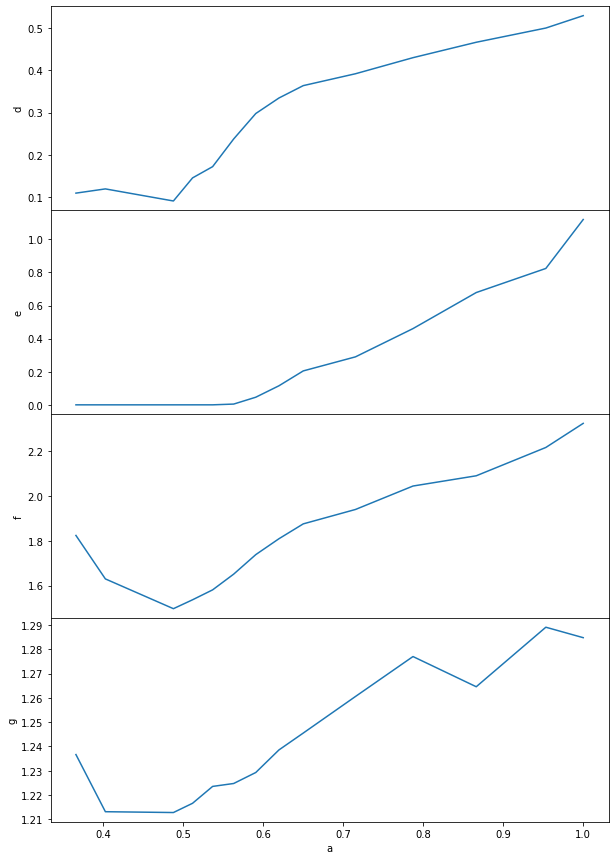

In [7]:
fig, axs = plt.subplots(ncols=1, nrows=4, figsize=(10,15), sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)

for i, param in enumerate(params):
    axs[i].plot(NvMs.keys(), params[param])
    axs[i].set_ylabel(param)
    
axs[-1].set_xlabel('a')